In [2]:
import pandas as pd
from CONSTANTS import DATA_PATH
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv(DATA_PATH + 'btc_daily_data_with_features.csv', index_col=0)
df.head()

,open,high,low,close,volume,Year,Month,Weekday,Day,rsi,sma_50,sma_200,macd,volatility
2011-08-19,10.90,10.90,10.90,10.90,0.0,2011,8,4,19,NaN,NaN,NaN,NaN,0.0
2011-08-20,11.85,11.85,11.15,11.69,1.0,2011,8,5,20,NaN,NaN,NaN,NaN,0.7
2011-08-21,11.70,11.70,11.70,11.70,0.0,2011,8,6,21,NaN,NaN,NaN,NaN,0.0
2011-08-22,11.70,11.70,11.70,11.70,0.0,2011,8,0,22,NaN,NaN,NaN,NaN,0.0
2011-08-23,11.70,11.70,11.70,11.70,0.0,2011,8,1,23,NaN,NaN,NaN,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4844 entries, 2011-08-19 to 2024-12-24
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        4844 non-null   float64
 1   high        4844 non-null   float64
 2   low         4844 non-null   float64
 3   close       4844 non-null   float64
 4   volume      4844 non-null   float64
 5   Year        4844 non-null   int64  
 6   Month       4844 non-null   int64  
 7   Weekday     4844 non-null   int64  
 8   Day         4844 non-null   int64  
 9   rsi         4831 non-null   float64
 10  sma_50      4795 non-null   float64
 11  sma_200     4645 non-null   float64
 12  macd        4819 non-null   float64
 13  volatility  4844 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 567.7+ KB


In [5]:
df.describe()

,open,high,low,close,volume,Year,Month,Weekday,Day,rsi,sma_50,sma_200,macd,volatility
count,4844.000000,4844.000000,4844.000000,4844.000000,4844.000000,4844.000000,4844.000000,4844.000000,4844.000000,4831.000000,4795.000000,4645.000000,4819.000000,4844.000000
mean,15077.585630,15456.605237,14674.508895,15096.368425,51107.738233,2017.841453,6.601775,3.000206,15.749174,53.995930,14751.074729,14094.776009,140.703756,782.096342
std,20853.847692,21332.422210,20366.118988,20888.395892,77881.819574,3.835731,3.457981,1.998916,8.793502,14.666514,19955.273546,18337.831394,1013.887733,1253.576347
min,2.220000,2.270000,2.220000,2.240000,0.000000,2011.000000,1.000000,0.000000,1.000000,9.632982,3.072200,4.651400,-5093.203934,0.000000
25%,379.515500,394.910000,369.515875,379.625000,6971.000000,2015.000000,4.000000,1.000000,8.000000,43.901599,400.616900,415.099300,-34.411906,16.150000
50%,6139.339300,6359.867200,5783.105850,6138.680000,23158.500000,2018.000000,7.000000,3.000000,16.000000,52.449437,6319.738000,6302.630050,1.042182,249.574300
75%,23634.570850,24197.445900,23105.438275,23669.464000,64448.250000,2021.000000,10.000000,5.000000,23.000000,63.222526,23473.087383,23969.627498,183.349758,994.519500
max,106145.291000,108353.119700,105319.122700,106133.370600,883271.000000,2024.000000,12.000000,6.000000,31.000000,97.088945,94058.268350,70590.113805,7045.648375,13171.040300


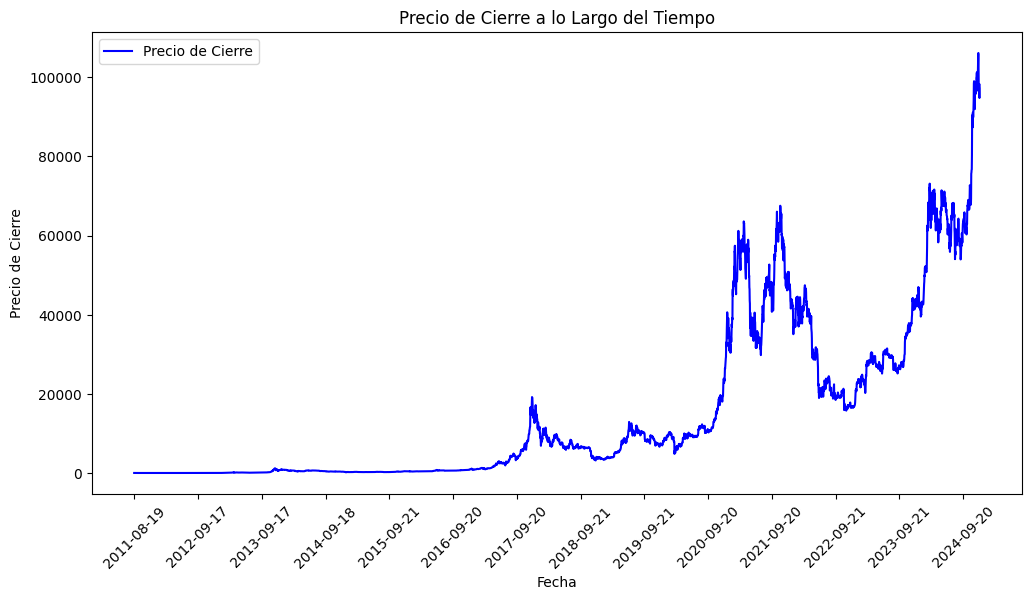

In [11]:
# Configurar el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Precio de Cierre', color='blue')
plt.title('Precio de Cierre a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.ylabel('Precio de Cierre')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

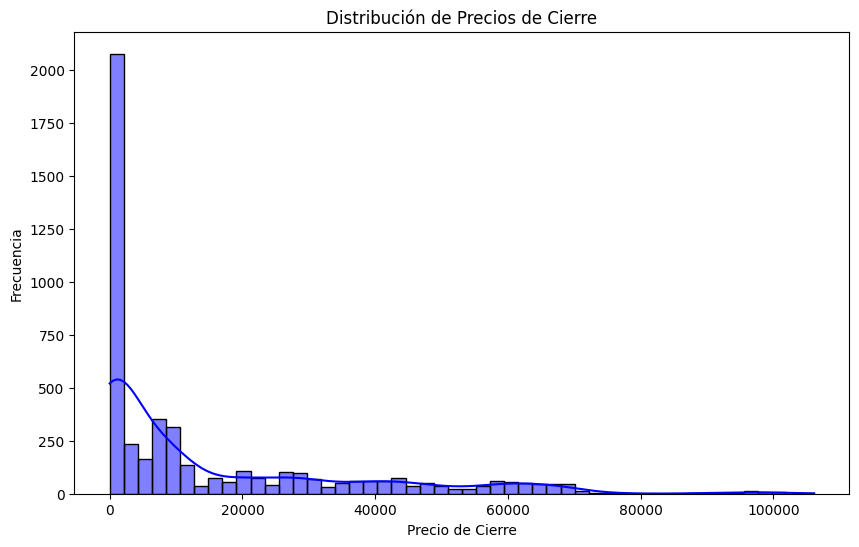

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True, bins=50, color='blue')
plt.title('Distribución de Precios de Cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

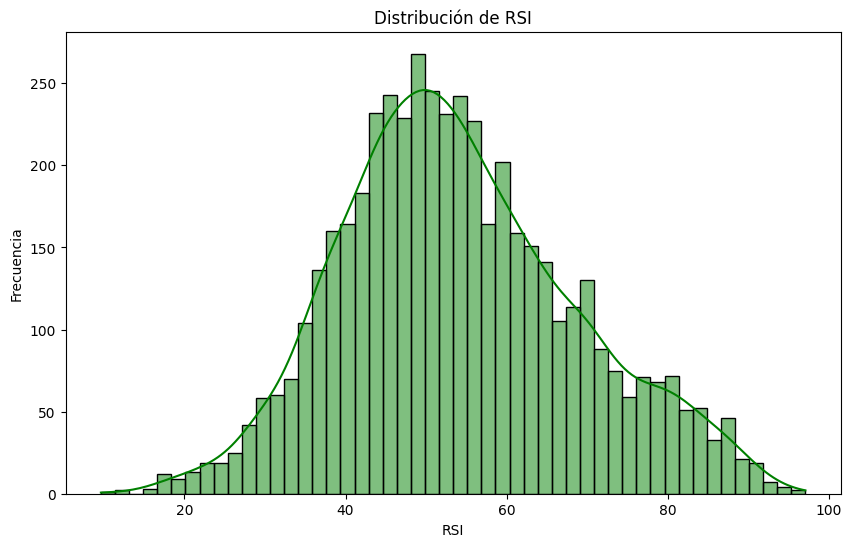

In [13]:
# Distribución de RSI
plt.figure(figsize=(10, 6))
sns.histplot(df['rsi'], kde=True, bins=50, color='green')
plt.title('Distribución de RSI')
plt.xlabel('RSI')
plt.ylabel('Frecuencia')
plt.show()

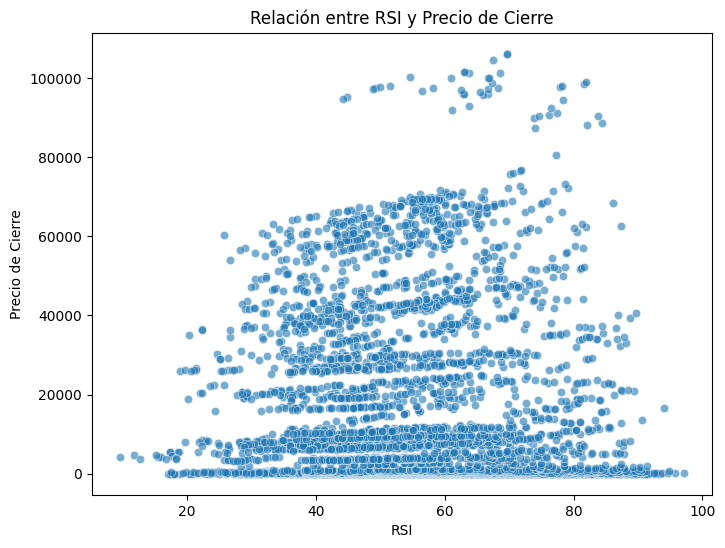

In [14]:
# Relación entre RSI y precio de cierre
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['rsi'], y=df['close'], alpha=0.6)
plt.title('Relación entre RSI y Precio de Cierre')
plt.xlabel('RSI')
plt.ylabel('Precio de Cierre')
plt.show()

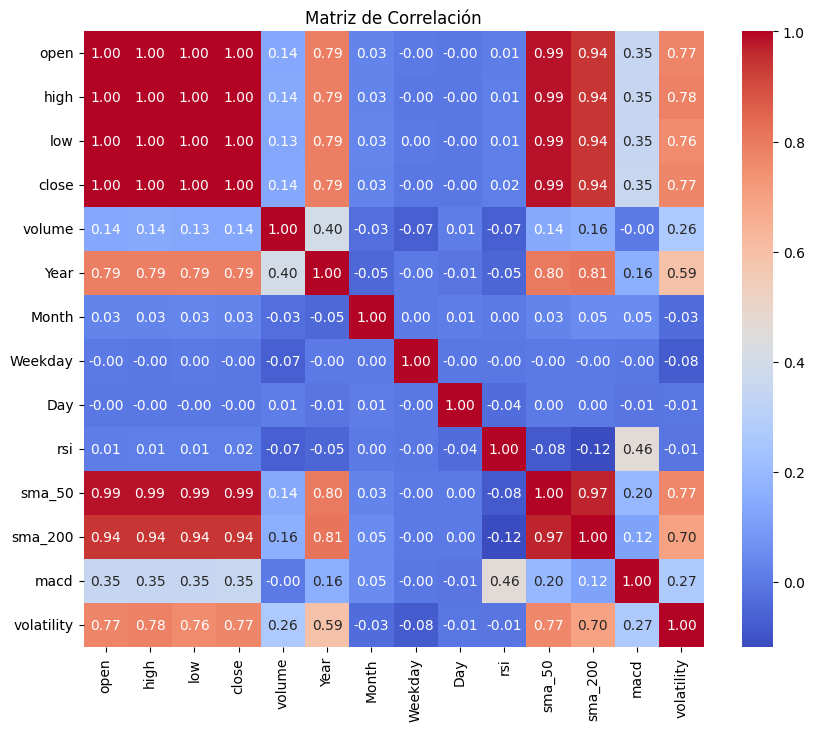

In [16]:
# Correlación entre columnas
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

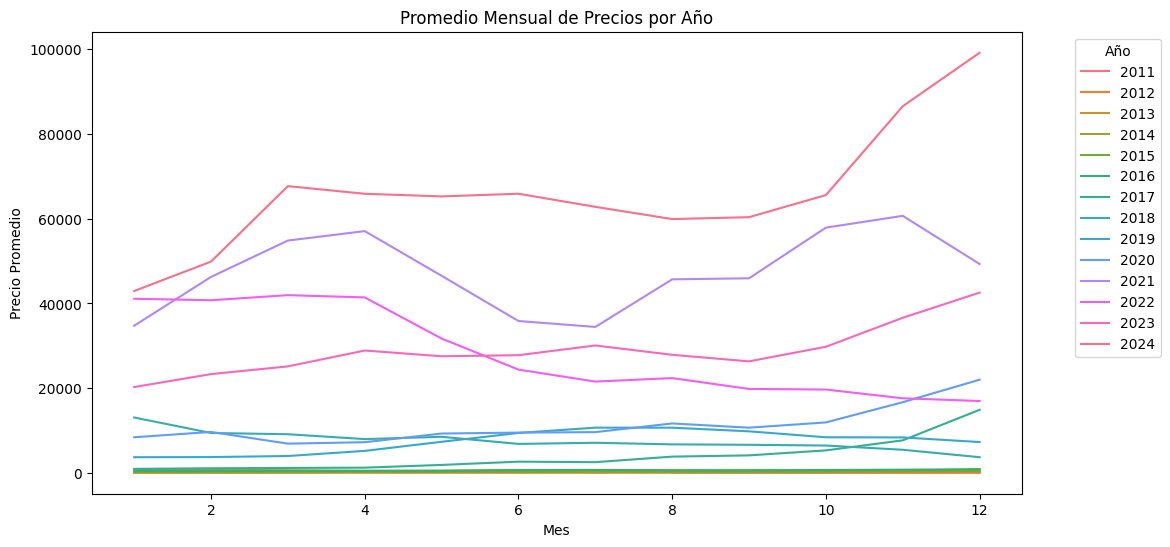

In [62]:
monthly_avg = df.groupby(["Year", "Month"])["close"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="Month",
    y="close",
    hue="Year",
    data=monthly_avg,
    palette="husl",
    legend="full",
)
plt.title("Promedio Mensual de Precios por Año")
plt.xlabel("Mes")
plt.ylabel("Precio Promedio")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

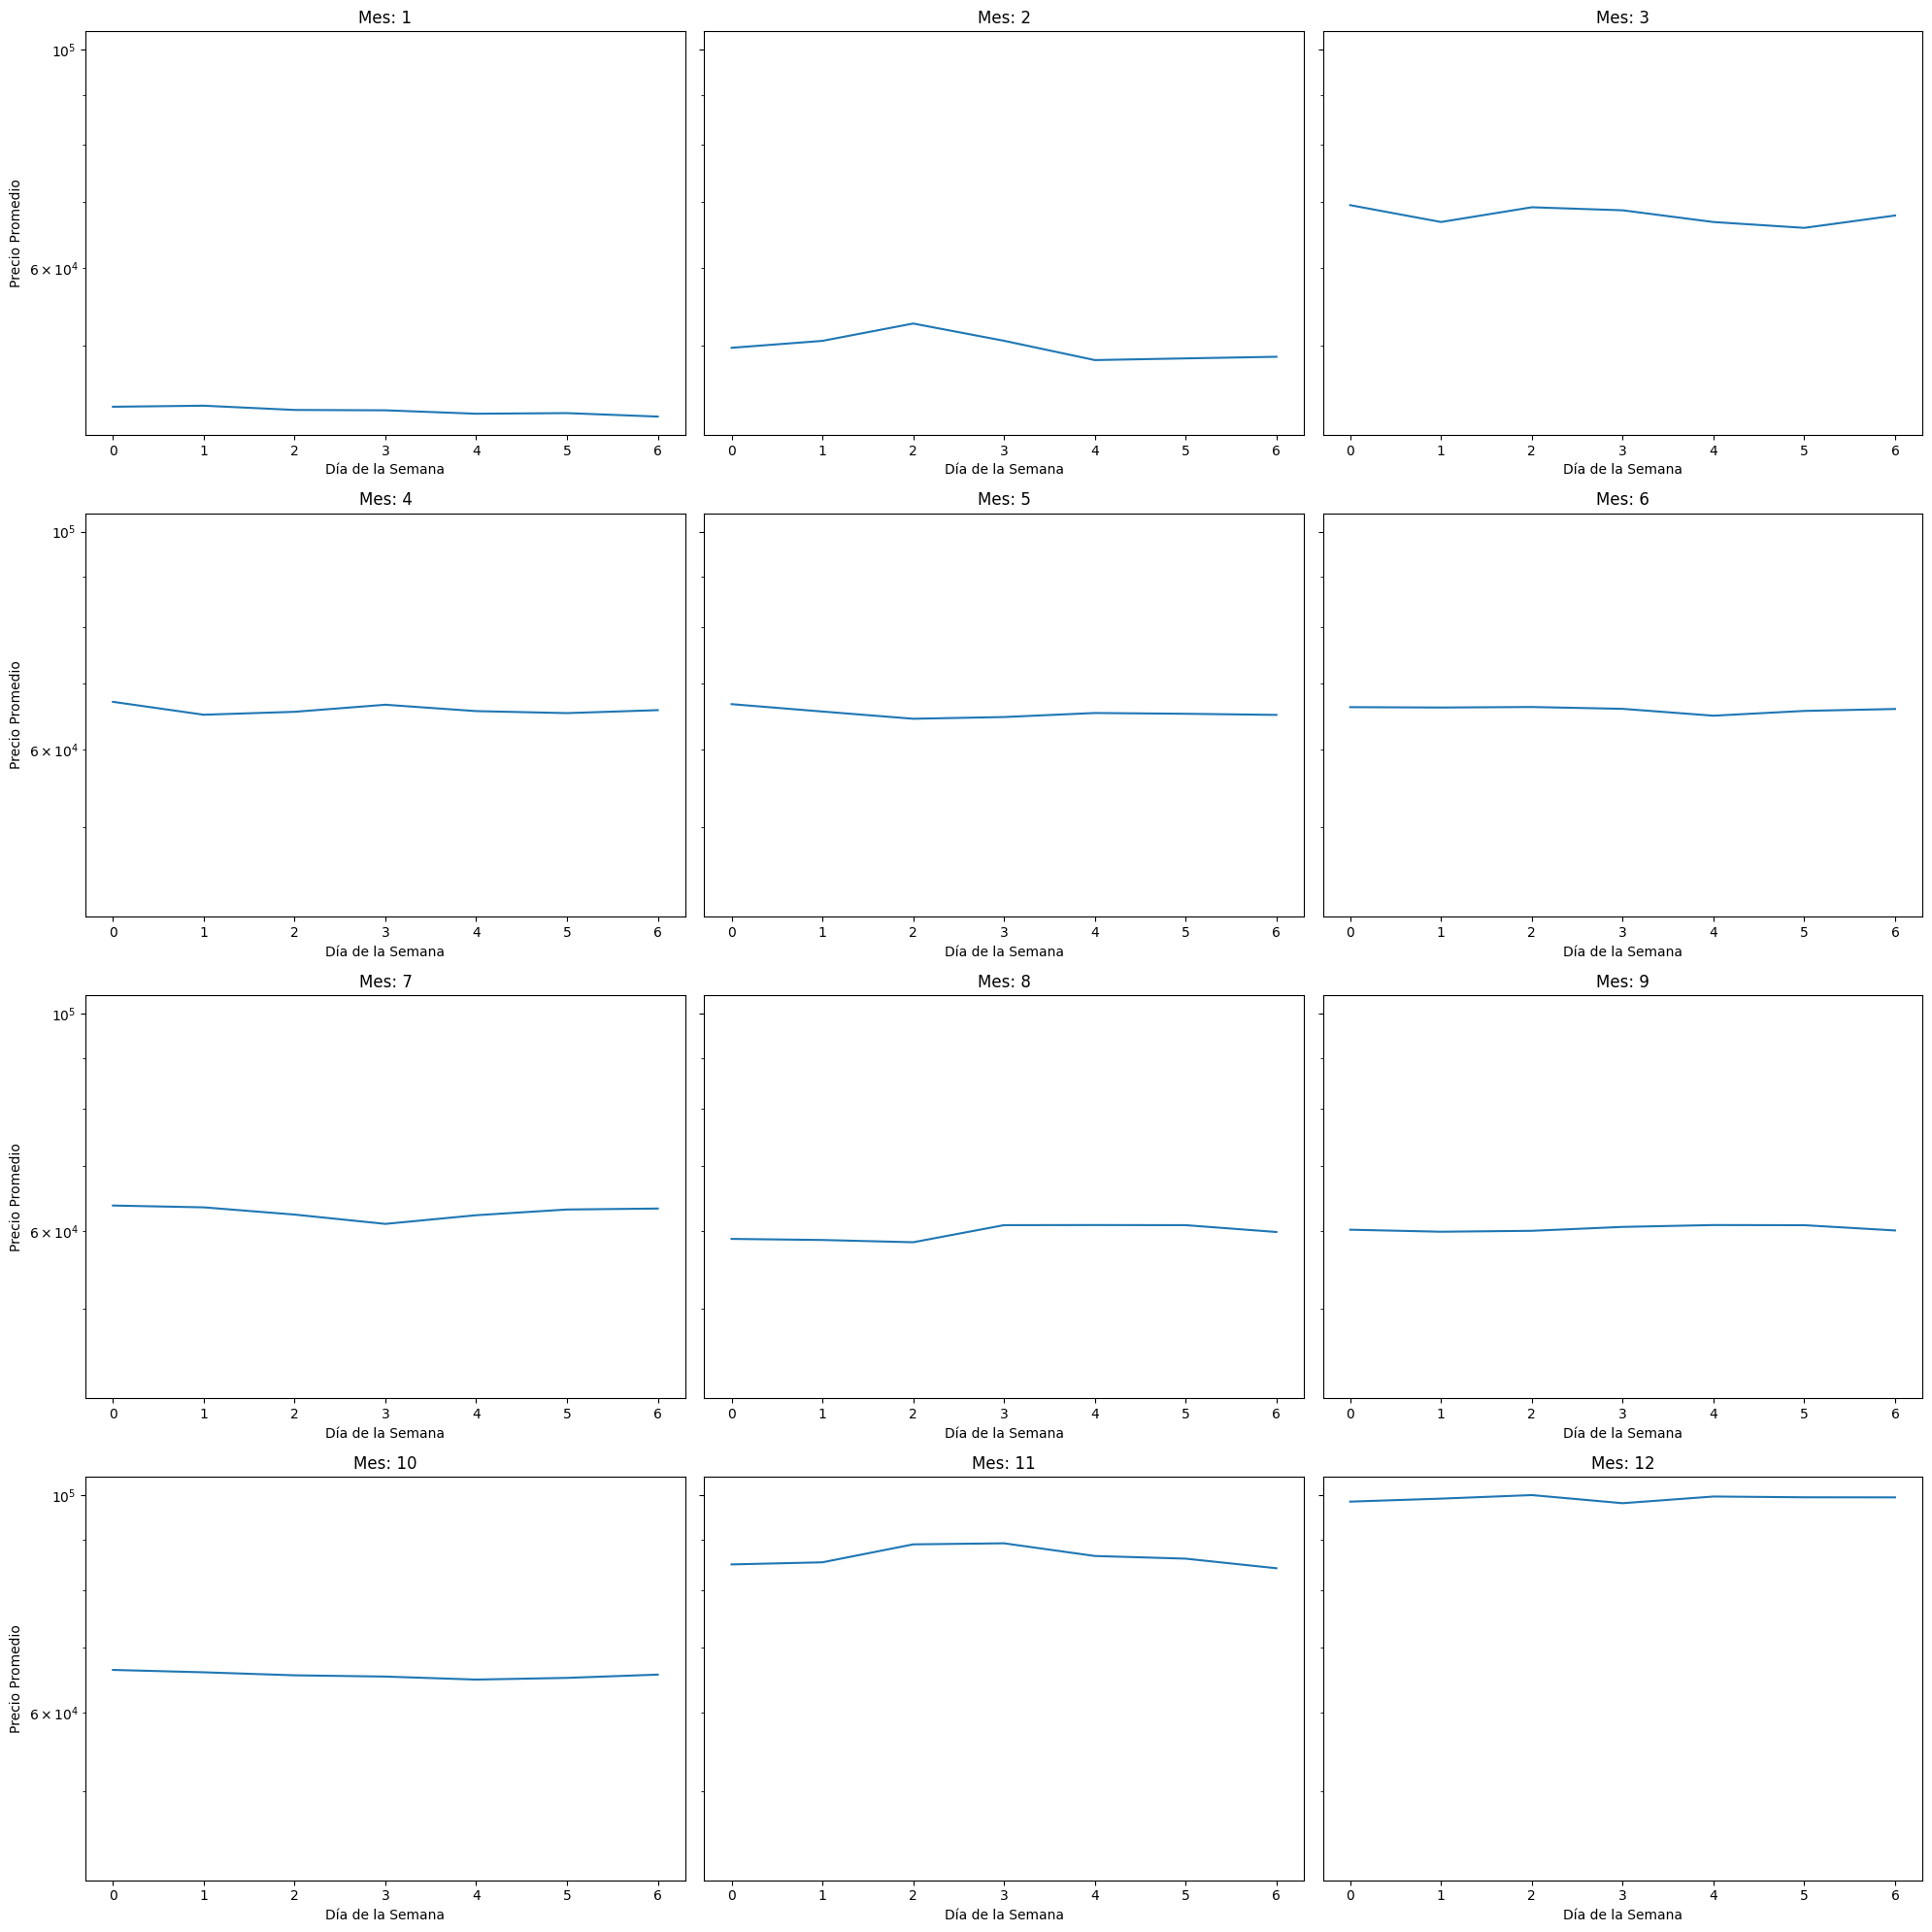

In [85]:
weekday_avg_2024 = df[df["Year"] == 2024].groupby(["Month", "Weekday"])["close"].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes en una grilla 3x4
fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)

# Ordenar los meses en orden ascendente
months = sorted(weekday_avg_2024["Month"].unique())

# Iterar sobre cada mes y cada eje
for i, (month, ax) in enumerate(zip(months, axes.flatten())):
    # Filtrar los datos para el mes actual
    month_data = weekday_avg_2024[weekday_avg_2024["Month"] == month]
    
    # Graficar la línea para el mes actual
    sns.lineplot(
        x="Weekday",
        y="close",
        data=month_data,
        ax=ax,
    )
    ax.set_yscale("log")
    # Configurar título y etiquetas
    ax.set_title(f"Mes: {month}")
    ax.set_xlabel("Día de la Semana")
    ax.set_ylabel("Precio Promedio")

# Ajustar el diseño
plt.tight_layout()
plt.show()


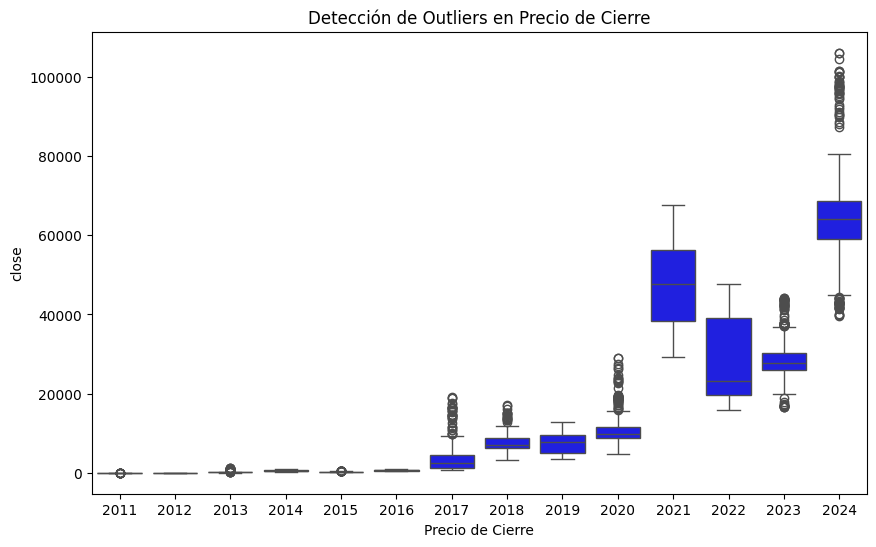

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['close'], x=df['Year'], color='blue')
plt.title('Detección de Outliers en Precio de Cierre')
plt.xlabel('Precio de Cierre')
plt.show()